<a href="https://colab.research.google.com/github/alyshapm/fods/blob/main/Forum_Week6_FoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imported necessary libraries
from google.colab import files
import pandas as pd
import io
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# To access the CSV file from local drive
dataset = files.upload()

Saving NOAA_Reef_Check__Bleaching_Data.csv to NOAA_Reef_Check__Bleaching_Data.csv


In [ ]:
# Using pandas to read the uploaded CSV
df = pd.read_csv(io.BytesIO(dataset['NOAA_Reef_Check__Bleaching_Data.csv']))

# Checking the datatypes and dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9111 entries, 0 to 9110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bleaching    9111 non-null   object 
 1   Ocean        9111 non-null   object 
 2   Year         9111 non-null   int64  
 3   Depth        9111 non-null   float64
 4   Storms       9111 non-null   object 
 5   HumanImpact  9111 non-null   object 
 6   Siltation    9111 non-null   object 
 7   Dynamite     9111 non-null   object 
 8   Poison       9111 non-null   object 
 9   Sewage       9111 non-null   object 
 10  Industrial   9111 non-null   object 
 11  Commercial   9111 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 854.3+ KB


,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,No,Atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,No,Pacific,1998,3.0,no,low,never,none,none,none,low,none
3,No,Pacific,1998,10.0,no,low,never,none,none,none,low,none
4,No,Atlantic,1997,10.0,no,high,never,none,none,high,moderate,none


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2)

train_data

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
5402,No,Red Sea,2007,10.0,no,low,never,none,none,none,none,none
2554,No,Pacific,2008,12.0,no,low,occasionally,none,none,none,none,none
4714,No,Pacific,2004,5.0,no,low,never,none,none,none,none,none
1977,No,Pacific,2006,5.0,no,low,occasionally,none,none,low,none,moderate
7056,No,Atlantic,2000,6.0,yes,moderate,never,none,none,moderate,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,No,Pacific,2013,2.0,yes,low,occasionally,none,none,none,none,none
7993,No,East Pacific,2009,7.0,no,low,occasionally,none,none,none,none,none
6778,No,Atlantic,2006,10.0,no,none,occasionally,none,none,none,none,low
6432,No,Atlantic,2015,10.6,no,low,occasionally,none,none,none,none,none


In [ ]:
test_data

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
5466,No,Red Sea,2015,5.0,no,low,never,none,none,low,low,low
4759,No,Pacific,2002,5.0,yes,low,never,none,none,none,none,none
5492,No,Red Sea,2012,5.0,no,high,never,none,none,none,low,high
6169,No,Indian,2012,7.0,yes,moderate,occasionally,low,none,none,none,none
1479,No,Indian,2007,3.0,no,low,never,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
3822,No,Pacific,2005,10.0,no,moderate,never,none,none,moderate,none,low
6700,No,Atlantic,1999,10.0,yes,low,never,none,none,none,none,none
3339,No,Pacific,2009,3.0,no,low,never,none,none,none,none,none
3348,No,Pacific,2009,3.5,yes,high,never,none,none,low,none,high


In [ ]:
# Splitting the dataset into features and target variable
feature_cols=['Storms','HumanImpact','Poison', 'Sewage', 'Industrial']
X = train_data[feature_cols] # Features
y = train_data['Bleaching'] # Target variable

In [ ]:
# .get_dummies() converts categorical data into dummy variables
X = pd.get_dummies(X)

In [ ]:
X.head()

,Storms_no,Storms_yes,HumanImpact_high,HumanImpact_low,HumanImpact_moderate,HumanImpact_none,Poison_high,Poison_low,Poison_moderate,Poison_none,Sewage_high,Sewage_low,Sewage_moderate,Sewage_none,Industrial_high,Industrial_low,Industrial_moderate,Industrial_none
5402,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2554,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4714,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1977,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
7056,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
# Importing the necessary libraries
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

0.9717343578485181


In [ ]:
# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


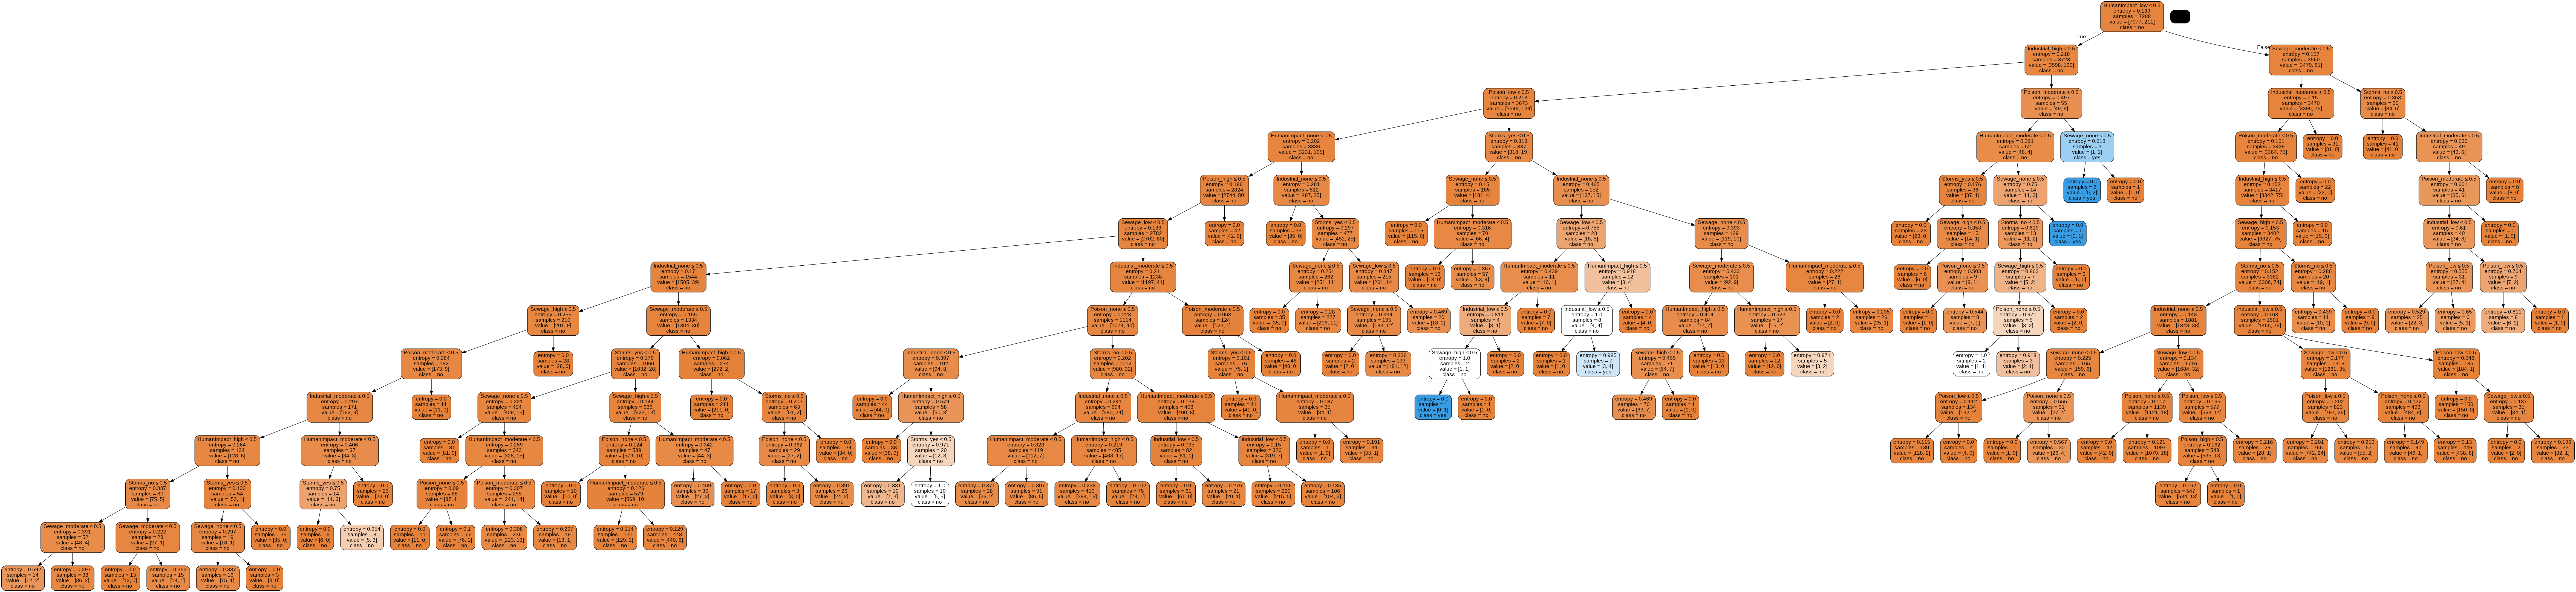

In [ ]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

0.9764125068568295
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


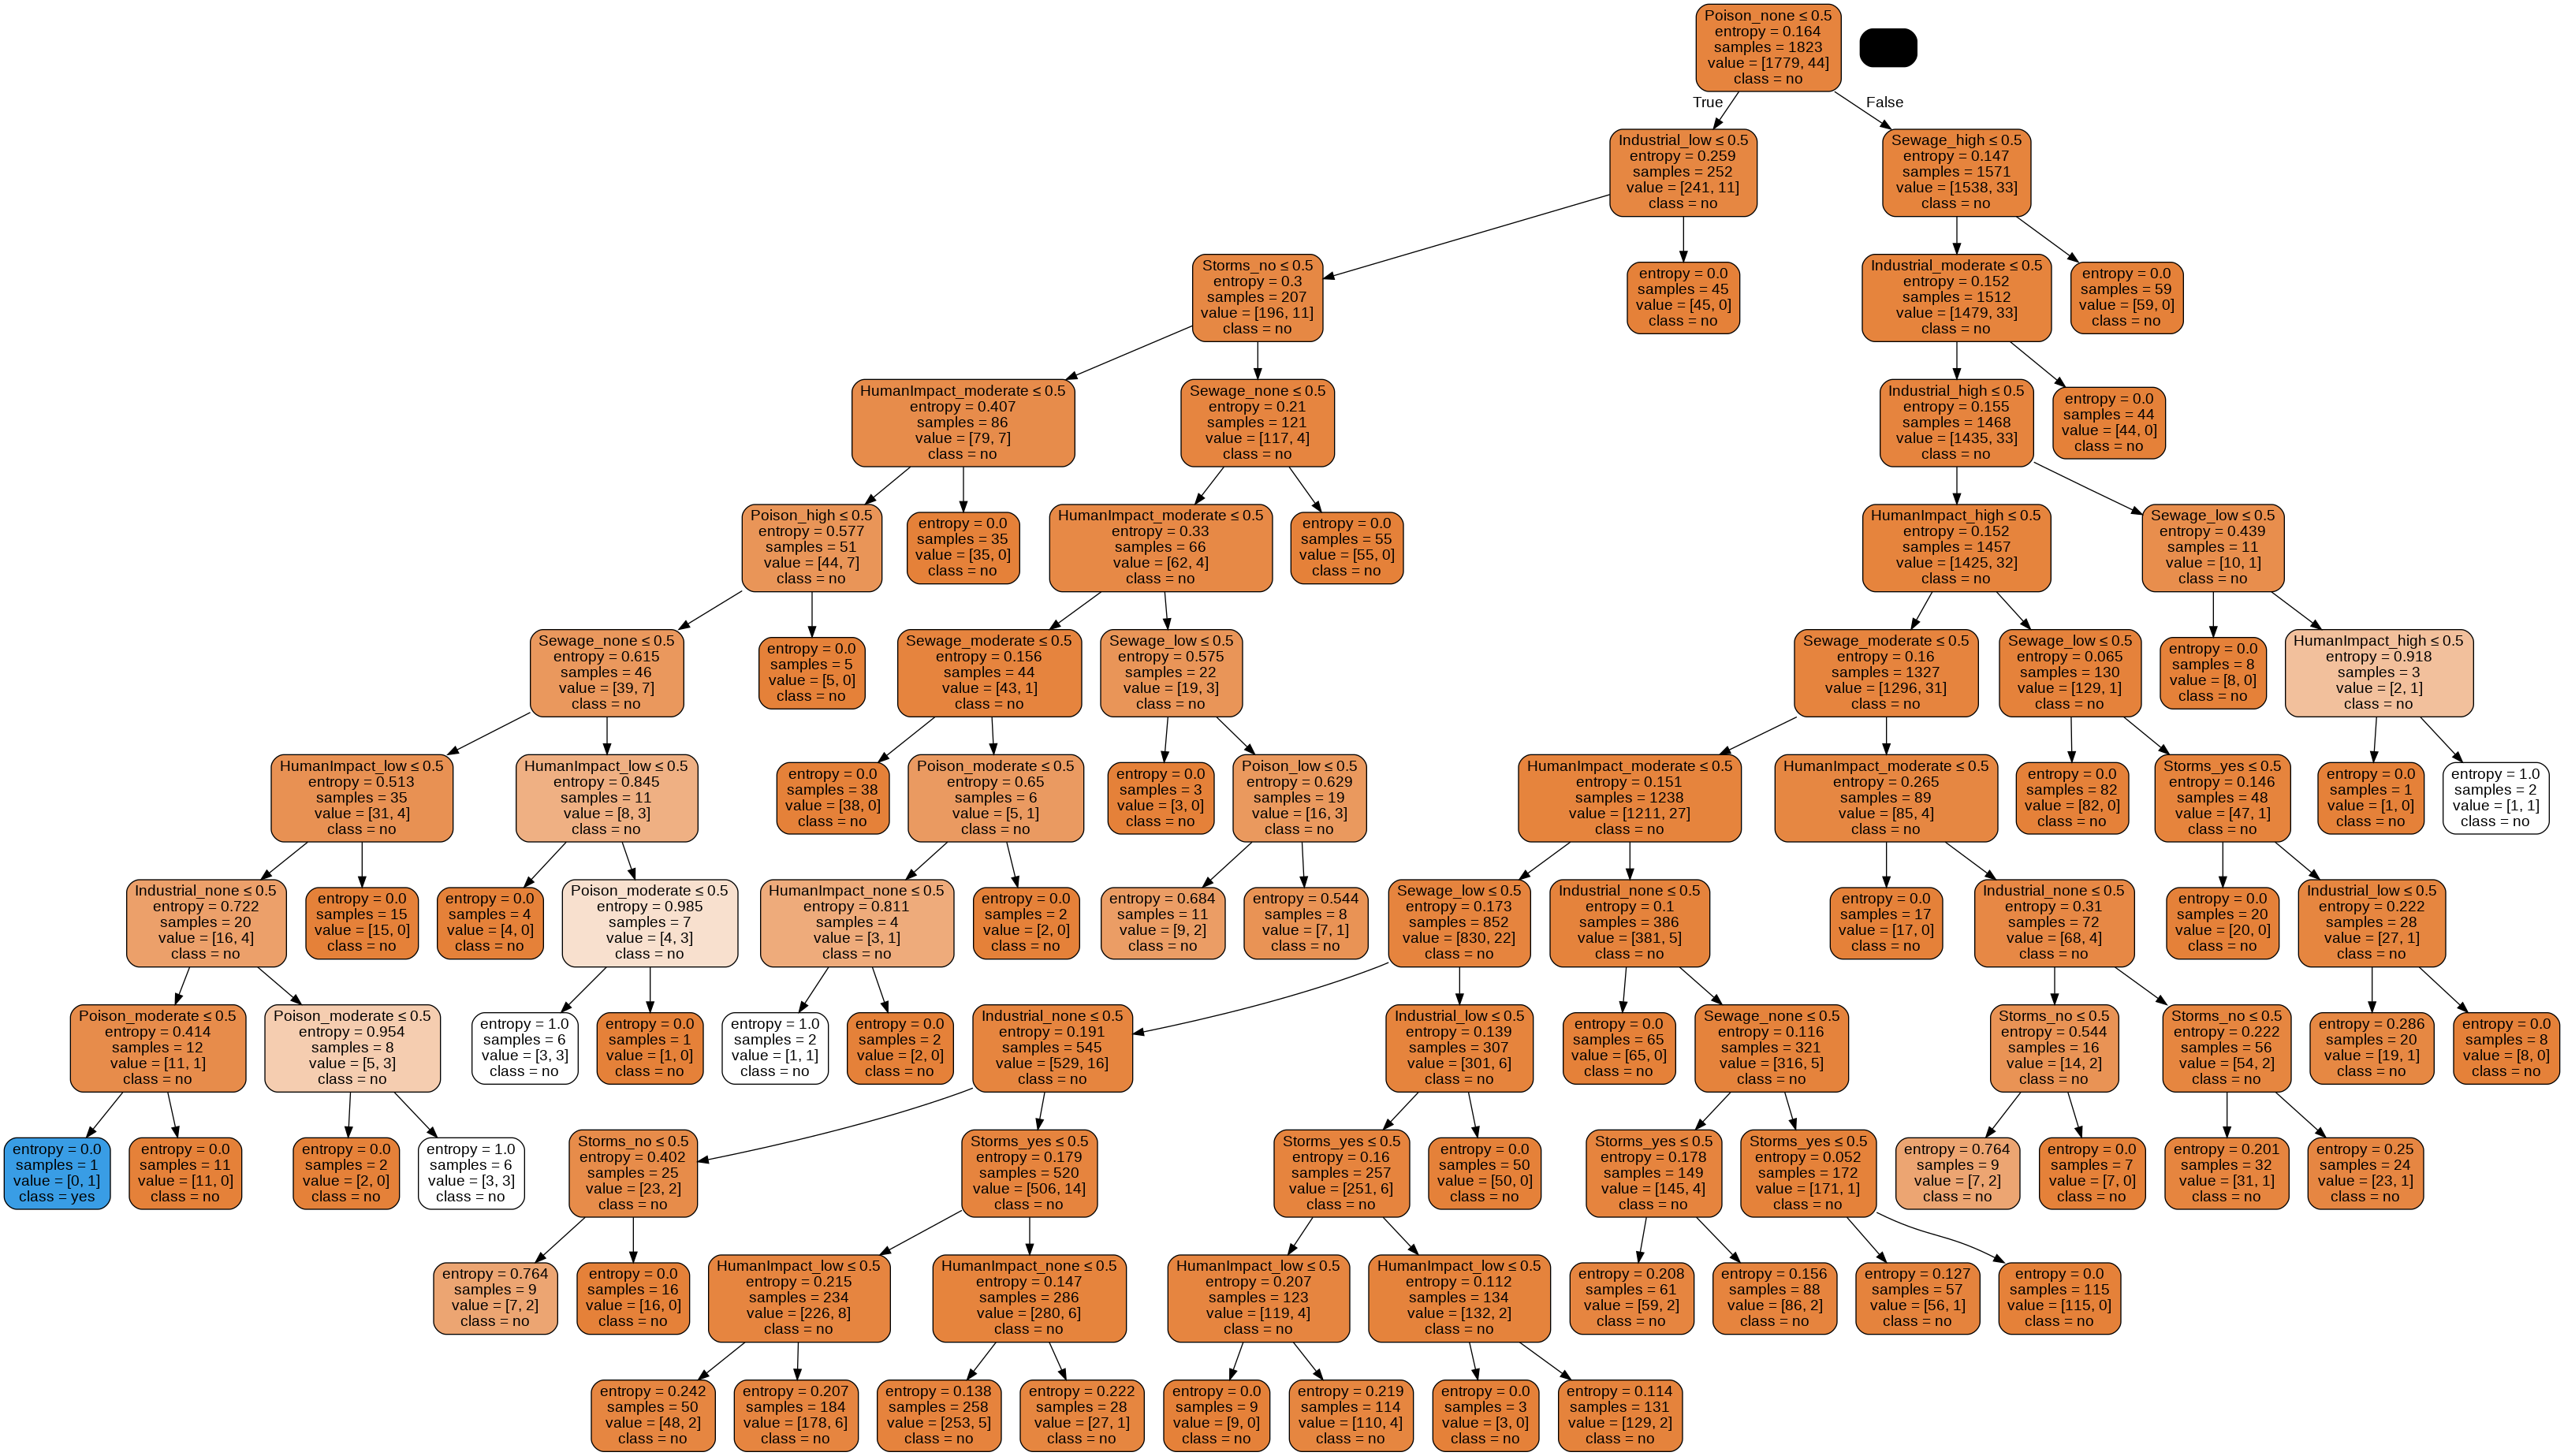

In [ ]:
# Decision tree for train data

feature_cols=['Storms','HumanImpact','Poison', 'Sewage', 'Industrial']
X = test_data[feature_cols] # Features
y = test_data['Bleaching'] # Target variable

X = pd.get_dummies(X)

# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability_train.png')
Image(graph.create_png())